In [406]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist,squareform
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [439]:
df = pd.read_csv('Data/emision-co2-autos.csv', encoding="cp1252")

In [ ]:
df.head(5)

In [ ]:
df.iloc[5, :]

In [ ]:
display(df.dtypes)
display(df.shape)

In [ ]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

In [408]:
#Elimino vehiculo_potencia
df.drop(columns=['vehiculo_potencia', 'lca_numero'], inplace=True)
df.dropna(inplace=True)

In [409]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_id_motor            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
fecha_firma                  0
ensayo_gei_numero            0
ensayo_gei_laboratorio       0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
id_etiqueta                  0
dtype: int64


In [410]:
display(df.shape)

(398, 17)

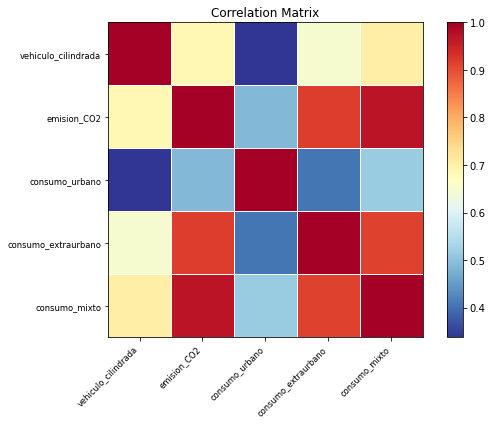

In [411]:
corr = df.set_index('vehiculo_modelo').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

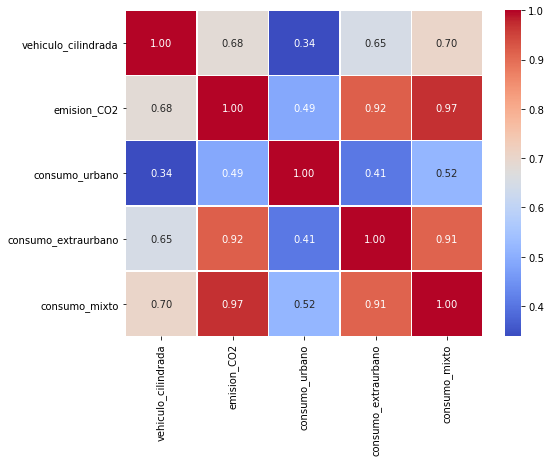

In [412]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

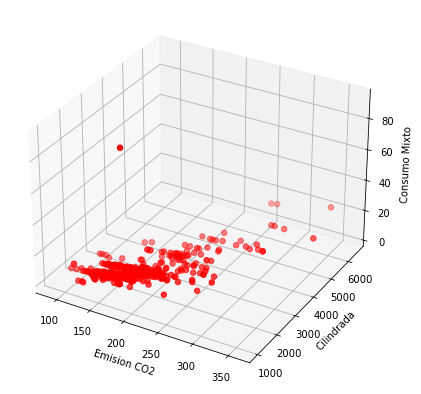

In [413]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (df.emision_CO2).mean()
std_z = (df.emision_CO2).std()*2
 
for index, x in enumerate(df.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(df.emision_CO2, df.vehiculo_cilindrada, df.consumo_urbano, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()

In [414]:
#sns.pairplot(df,hue='emision_CO2');

In [415]:
#!pip install pyod  # instala la librería

In [416]:
#Trato de indentificar Outliers para eliminar y mejorar el Clustering.
# https://www.aprendemachinelearning.com/deteccion-de-outliers-en-python-anomalia/

from pyod.models.knn import KNN

X = df.filter(['vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#X.loc[500] = [50000, 340, 22, 20, 5]

clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
index_outliers = X[y_pred == 1]
X[y_pred == 1]

,vehiculo_cilindrada,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,4461.0,260.70,11.56,8.94,9.90
6,3456.0,145.00,6.60,5.90,6.20
13,1248.0,136.64,7.46,4.97,5.89
39,1798.0,88.00,3.70,3.80,3.80
46,1560.0,99.90,4.60,3.50,3.90
57,6162.0,260.00,17.40,7.80,11.30
58,6162.0,269.00,18.10,8.10,11.70
77,999.0,126.67,6.90,4.58,5.44
80,2891.0,187.98,12.42,5.72,8.15
83,2393.0,197.00,8.90,6.60,7.50


In [417]:
vehiculos_outliers = df.loc[index_outliers.index.tolist(), :]
vehiculos_outliers 


,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,AUTOMÁTICA,GAS OIL,EURO V,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
6,LEXUS,GS450H,SEDÁN 4 PUERTAS,4x2,TOYOTA 2GR-FXE,3456.0,CVT,NAFTA / ELECTRICIDAD,EURO V,31/08/2016,H16600550047/066,VINÇOTTE nv,145.00,6.60,5.90,6.20,000214B
13,HYUNDAI,GRAND i10,SEDÁN 5 PUERTAS,4x2,HYUNDAI G4LA,1248.0,MANUAL,NAFTA,EURO V,31/01/2017,KR14040131,IDIADA,136.64,7.46,4.97,5.89,000137A
39,TOYOTA,PRIUS,SEDÁN 5 PUERTAS,4x2,TOYOTA 2ZR-FXE NAFTA ELÉCTRICO,1798.0,CVT,NAFTA,EURO V,18/12/2017,JSQ326127,VCA,88.00,3.70,3.80,3.80,000003A
46,PEUGEOT,208,BERLINA 5 PUERTAS,4x2,PEUGEOT DV6DTED (9HP),1560.0,MANUAL,GAS OIL,EURO V,13/06/2016,15/06824,UTAC,99.90,4.60,3.50,3.90,000353B
57,CHEVROLET,CAMARO 6.2,SEDÁN 3 PUERTAS COUPÉ,4x2,CHEVROLET LT1 - 6.2L,6162.0,AUTOMÁTICA,NAFTA,EURO VI a,30/08/2016,LCA 53 0012 297 15,LUXCONTROL S.A.,260.00,17.40,7.80,11.30,000075A
58,CHEVROLET,CAMARO 6.2,CONVERTIBLE,4x2,CHEVROLET LT1 - 6.2L,6162.0,AUTOMÁTICA,NAFTA,EURO VI a,30/08/2016,LCA 53 0012 297 15,LUXCONTROL S.A.,269.00,18.10,8.10,11.70,000076A
77,VOLKSWAGEN,UP! - UP! TSI,SEDÁN 2 o 4 PUERTAS CON PORTÓN TRASERO,4x2,VOLKSWAGEN DNB,999.0,MANUAL,NAFTA,EURO V,27/06/2017,259/16,LABORATORIO DE VOLKSWAGEN DO BRASIL,126.67,6.90,4.58,5.44,000260B
80,ALFA ROMEO,GIULIA QUADRIFOGLIO,BERLINA,4x2,ALFA ROMEO 670050436,2891.0,AUTOMÁTICA,NAFTA,EURO VI b,19/07/2017,G0415/2/BO,CENTRO PROVA AUTOVEICOLI BOLOGNA,187.98,12.42,5.72,8.15,000196B
83,TOYOTA,HILUX,PICK UP CABINA SIMPLE DOBLE,4x2 - 4x4,TOYOTA 2GD-FTV,2393.0,MANUAL,GAS OIL,EURO V,03/08/2017,JST407442,VCA,197.00,8.90,6.60,7.50,000072A


In [418]:
vehiculos_outliers.shape

(47, 17)

In [419]:
X.shape

(398, 5)

In [420]:
vehiculos_analisis = df.drop(index_outliers.index.tolist(), axis=0)

In [421]:
vehiculos_analisis.shape

(351, 17)

In [422]:
vehiculo_combustible_df = vehiculos_analisis.filter(['vehiculo_tipo_combustible','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
vehiculo_combustible_df.dtypes

vehiculo_tipo_combustible     object
vehiculo_cilindrada          float64
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
dtype: object

In [423]:
sns.pairplot(vehiculo_combustible_df, hue='vehiculo_tipo_combustible', diag_kws={'bw': 0.2});

/home/ignacio/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Error in callback <function flush_figures at 0x7fa85fa7a4d0> (for post_execute):


KeyboardInterrupt: 

In [424]:
#vehiculo_tipo_df = df.filter(['vehiculo_tipo','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#sns.pairplot(vehiculo_tipo_df, hue='vehiculo_tipo', diag_kws={'bw': 0.2});

In [425]:
vehiculos_analisis.vehiculo_tipo.value_counts()

SEDÁN 4 PUERTAS                                                                37
SEDÁN 5 PUERTAS                                                                29
SUV                                                                            25
RURAL                                                                          25
BERLINA                                                                        15
                                                                               ..
TODO TERRENO                                                                    1
SEDÁN 4 PUERTAS CON PORTÓN TRASERO HB / SEDÁN 4 PUERTSA CON BAÚL TRASERO NB     1
FURGONETA                                                                       1
FAMILIAR RURAL                                                                  1
HATCH 5 PUERTAS SEDÁN 5 PUERTAS                                                 1
Name: vehiculo_tipo, Length: 93, dtype: int64

In [426]:
vehiculos_analisis.vehiculo_tipo.unique()

array(['SEDÁN 4 PUERTAS', 'COUPÉ 3 + 2 PUERTAS', 'BERLINA 3 PUERTAS',
       'BERLINA 5 PUERTAS', 'SUV', 'HATCH 5 PUERTAS SEDÁN 5 PUERTAS',
       'BERLINA 4 PUERTAS', 'CHASIS LARGO / CHASIS EXTRA LARGO',
       'SEDÁN 5 PUERTAS', 'CAMIONETA 4 PUERTAS',
       'FURGÓN / CHASIS CON CABINA', 'CAMIÓN', 'RURAL 5 PUERTAS 2WD',
       'RURAL 5 PUERTAS 4WD', 'FURGONETA', 'TODO TERRENO',
       'SEDÁN 3/5 PUERTAS', '5 PUERTAS HB', 'BERLINA 3 PUERTAS CABRIOLET',
       'SEEDÁN 4 PUERTAS', 'SEDÁN 5 PUERTAS / COUPÉ', 'CONVERTIBLE',
       'SEDÁN 3 PUERTAS / 5 PUERTAS / COUPÉ', 'BERLINA',
       'RURAL 5 PUERTAS', 'HATCHBACK', 'RURAL', 'MICROOMNIBUS',
       'PICK UP CABINA DOBLE', 'FAMILIAR-FURGÓN', 'PICK UP', 'SEDÁN',
       'PICK UP CABINA SIMPLE - CABINA DOBLE', 'MINIBUS - FURGÓN',
       'MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO',
       'MOMOVOLÚMEN 4PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)',
       'MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)',
       'MOMOVOLÚMEN 4PUERTAS Y PORT

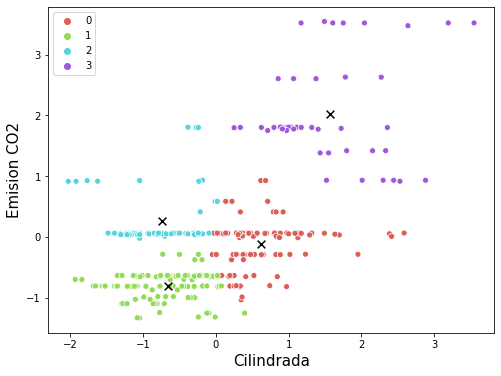

In [427]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=vehiculos_analisis[['emision_CO2','vehiculo_cilindrada']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=4,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Cilindrada',fontsize=15);plt.ylabel('Emision CO2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');

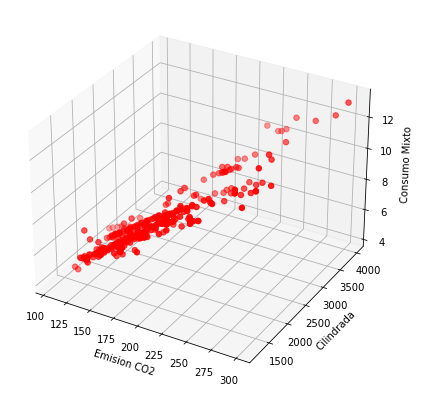

In [428]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (vehiculos_analisis.emision_CO2).mean()
std_z = (vehiculos_analisis.emision_CO2).std()*2
 
for index, x in enumerate(vehiculos_analisis.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(vehiculos_analisis.emision_CO2, vehiculos_analisis.vehiculo_cilindrada,vehiculos_analisis.consumo_mixto, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()

In [429]:
tipo_df = pd.read_csv('Data/tipo_vehiculos.csv'  )

In [430]:
#Costo.. pero salio!!!!
tipo_df_dic = tipo_df.set_index('ID').T.to_dict('list')
#tipo_df_dic

In [431]:
vehiculos_analisis.vehiculo_tipo = vehiculos_analisis.vehiculo_tipo.replace(tipo_df_dic)


In [432]:
#vehiculos_analisis = vehiculos_analisis.replace({"vehiculo_tipo": tipo_df_dic})

In [433]:
vehiculos_analisis

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,RENAULT M4RK7,1997.0,CVT,NAFTA,EURO V,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
4,CITROËN,DS4,Coupe,4x2,CITROËN EP6CDTM (5FM),1598.0,AUTOMÁTICA,NAFTA,EURO V,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A
5,CITROËN,DS3,Coupe,4x2,CITROËN EP6CDT (5FV),1598.0,MANUAL,NAFTA,EURO V,21/12/2011,11/02413,UTAC,140.80,8.20,4.70,6.00,000118A
7,CITROËN,DS3,Coupe,4x2,CITROËN EP6C (5FS),1598.0,MANUAL,NAFTA,EURO V,01/10/2012,09/02572,UTAC,141.20,8.00,4.90,6.00,000120A
8,PEUGEOT,208,5 Puertas,4x2,EC5 (NFP),1587.0,MANUAL,NAFTA,EURO V,19/04/2018,R1-0220/17,DELPHI,173.77,10.17,5.84,7.44,000415B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,PORSCHE,911 CARRERA S (CB22) / 911 CARRERA 4S (KB12 KB22),Coupe,4x2 / 4x4,PORSCHE DKK,2981.0,AUTOMÁTICA,NAFTA,EURO V,09/08/2019,42.07.253.00,TÜV NORD Mobilität,213.40,13.60,7.30,9.60,000389B
408,FORD,KUGA 2.5L FHEV,SUV,4x2,FORD 2.5L DURA D4 IVCT ATK FHEV / TOSHIBA PERM...,2488.0,E-CVT (Hibrida controlada electrónicamente),NAFTA / ELECTRICIDAD,EURO V,20/08/2019,3071-603239,TÜV Rheinland,120.00,4.10,5.80,5.10,000402B
409,VOLKSWAGEN,BEETLE,Coupe,4x2,VOLKSWAGEN CPLA,1984.0,AUTOMÁTICA,NAFTA,EURO V,12/09/2019,11.06.1734.04,TÜV NORD Mobilität,186.90,10.50,6.50,8.00,000424B
410,VOLKSWAGEN,BEETLE,Coupe,4x2,VOLKSWAGEN CTHD,1390.0,MANUAL,NAFTA,EURO V,12/09/2019,11.06.1876.02,TÜV NORD Mobilität,163.10,9.00,5.80,7.00,000426B


In [434]:
vehiculos_analisis.vehiculo_tipo.unique()

array(['4 Puertas', 'Coupe', '5 Puertas', 'SUV', 'Chasis Largo',
       'PICK UP', 'Furgon', 'Camion', '4x4', 'Rural', 'BUS'], dtype=object)

In [435]:
vehiculos_analisis.vehiculo_tipo.value_counts()

4 Puertas       88
5 Puertas       75
Rural           45
SUV             43
Coupe           42
PICK UP         39
Furgon           6
Camion           5
BUS              4
4x4              3
Chasis Largo     1
Name: vehiculo_tipo, dtype: int64

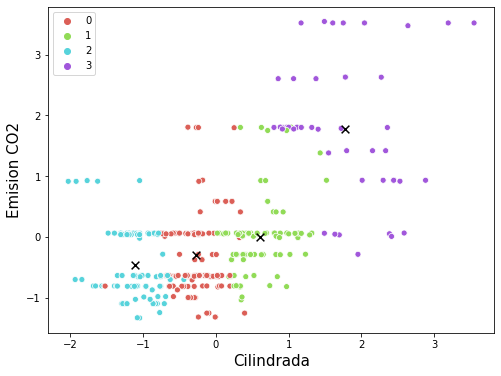

In [436]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=vehiculos_analisis[['emision_CO2','vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=4,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Cilindrada',fontsize=15);plt.ylabel('Emision CO2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');